In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.03 		 0.38 |
| 1000 		 0.08 		 0.0 |
| 1000 		 0.01 		 0.12 |
| 1000 		 0.16 		 0.29 |
| 1000 		 0.11 		 0.35 |
| 1000 		 0.11 		 0.22 |
| 1000 		 0.35 		 0.16 |
| 1000 		 0.41 		 0.34 |
| 1000 		 0.17 		 0.15 |
| 1000 		 0.02 		 0.09 |
| 1000 		 0.52 		 0.23 |
| 1000 		 0.29 		 0.18 |
| 1000 		 0.12 		 0.06 |
| 1000 		 0.24 		 0.33 |
| 1000 		 0.01 		 0.17 |
| 1000 		 0.08 		 0.09 |
| 1000 		 0.05 		 0.25 |
| 1000 		 0.14 		 0.32 |
| 1000 		 0.28 		 0.2 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.14
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.21
The mean of I is: 0.2
-------------------------------------


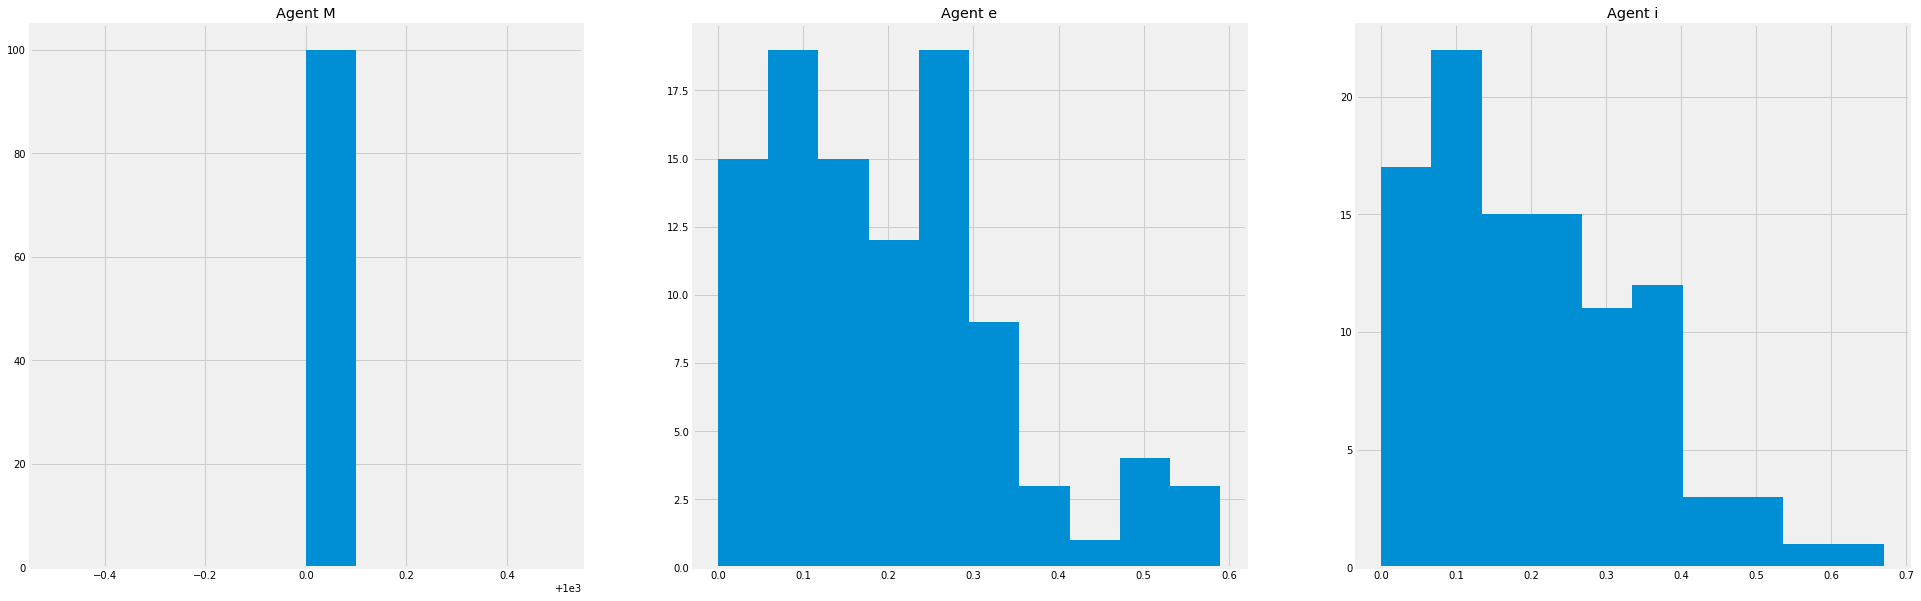

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: -0.0, Temptation: 30.0, Sucker: -30.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 80.0, Temptation: 80.0, Sucker: -0.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 26.0, Temptation: 30.0, Sucker: -4.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 6.0, Temptation: 10.0, Sucker: -4.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: -31.0, Temptation: 30.0, Sucker: -61.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 151.0, Temptation: 160.0, Sucker: -

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 33 minutes.
    S.D.  Counts Seed
0    0.5     248  512
1    0.6     217  512
2    0.7     203  512
3    0.8     188  512
4    0.9     169  512
5    1.0     177  512
6    1.1     154  512
7    1.2     142  512
8    1.3     134  512
9    1.4     131  512
10   1.5     113  512
11   1.6      93  512
12   1.7      75  512
13   1.8      56  512
14   1.9      37  512
15   2.0      28  512
16   2.1       9  512
17   2.2       6  512
18   2.3       5  512
19   2.4       8  512
20   2.5       5  512
21   2.6       5  512
22   2.7       2  512
23   2.8       1  512
24   2.9       0  512
25   3.0       0  512


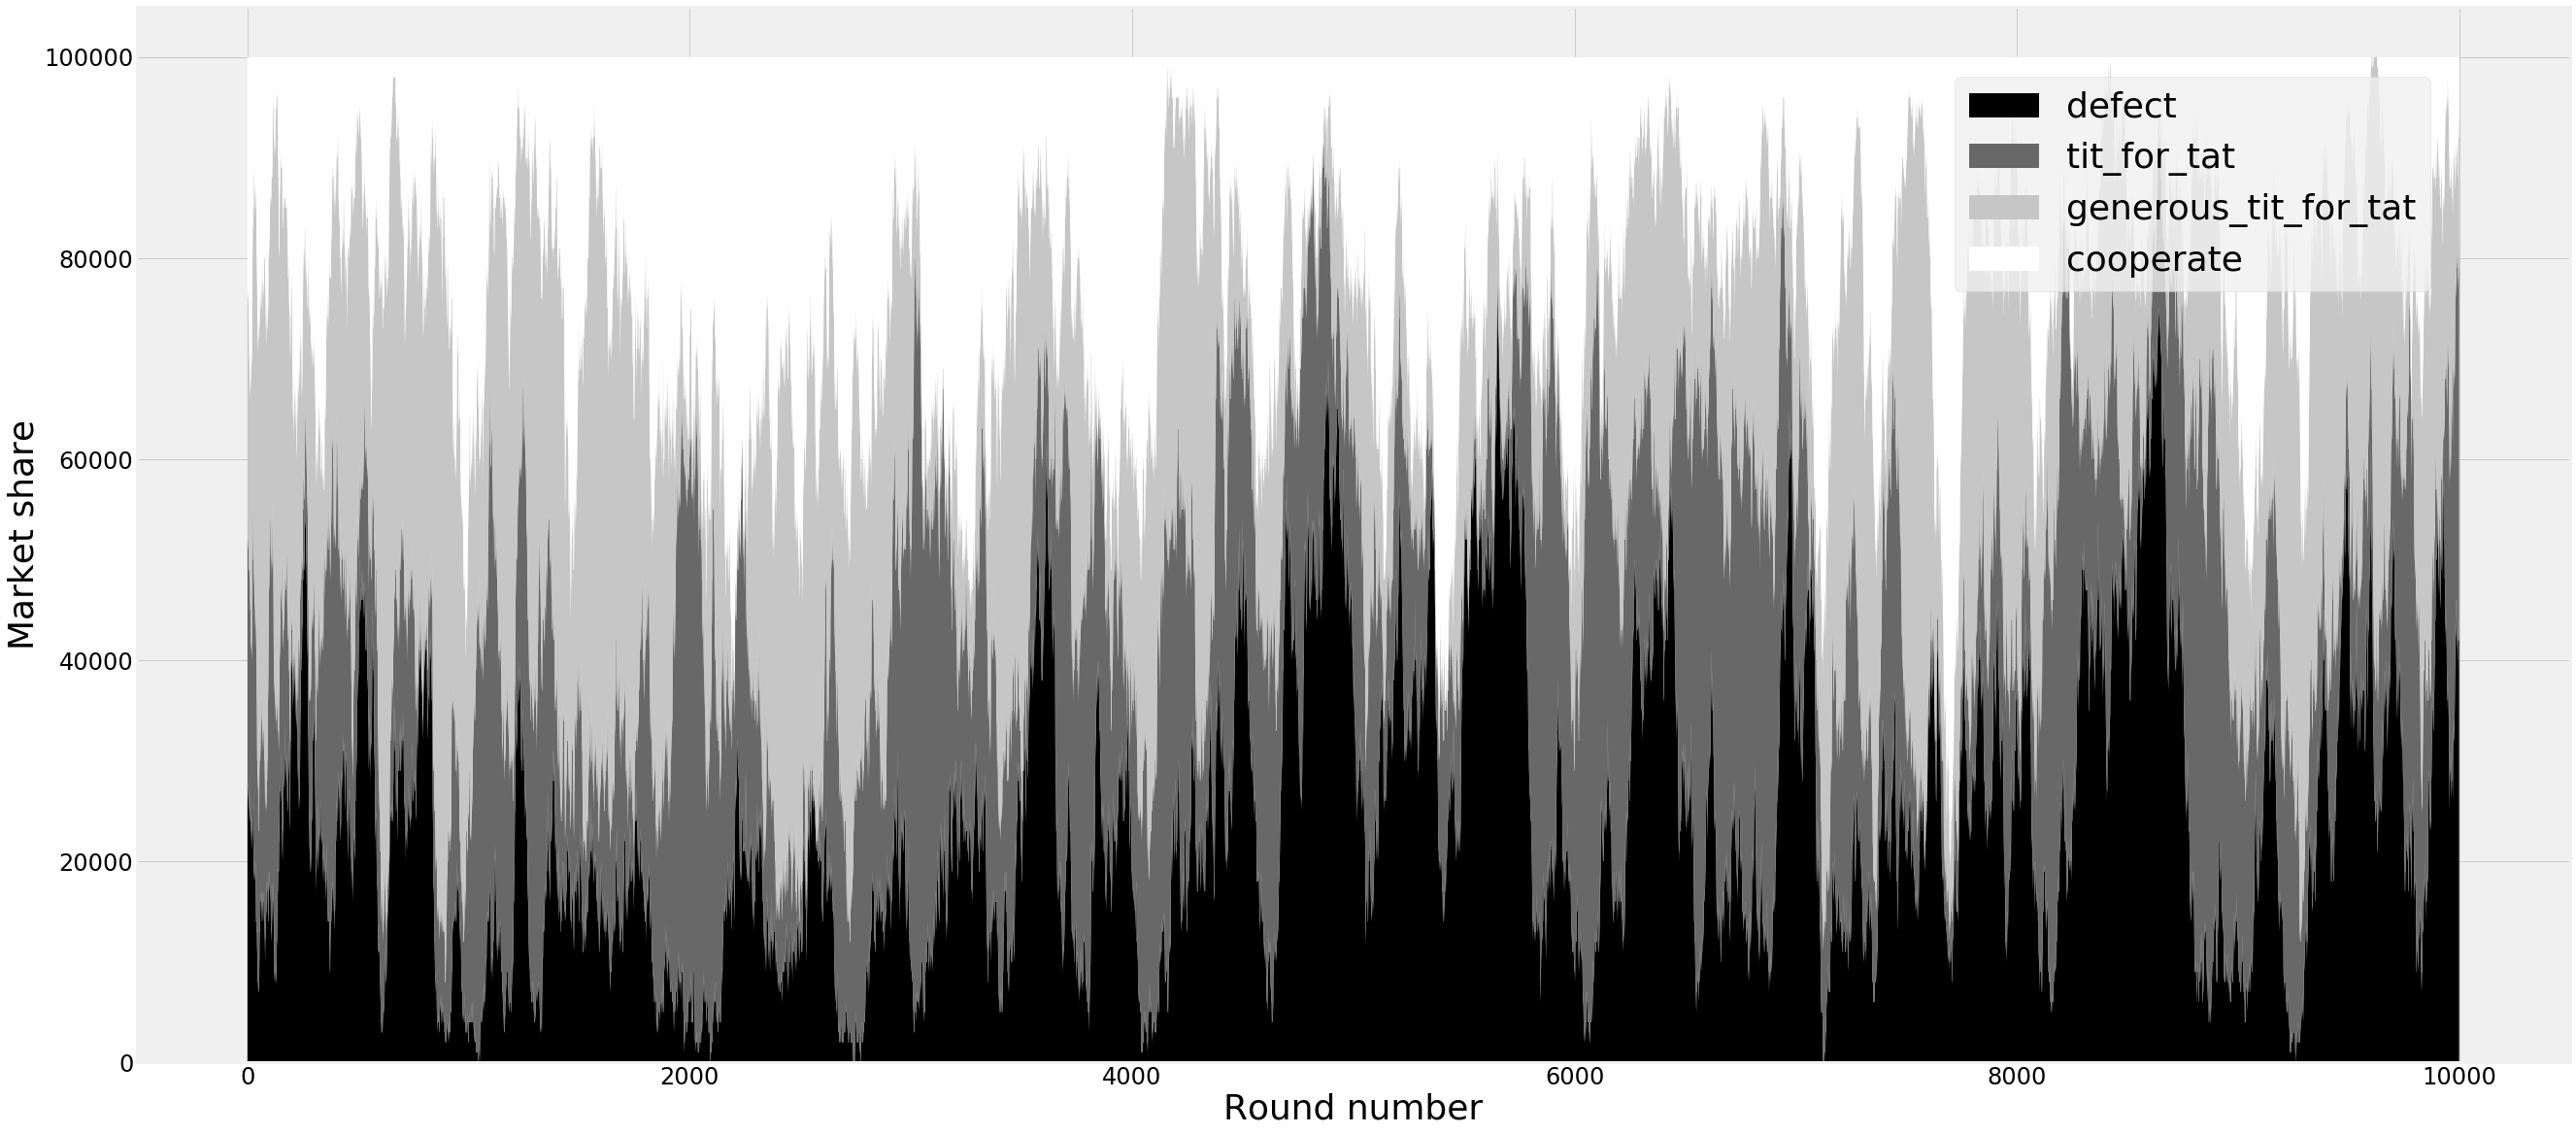

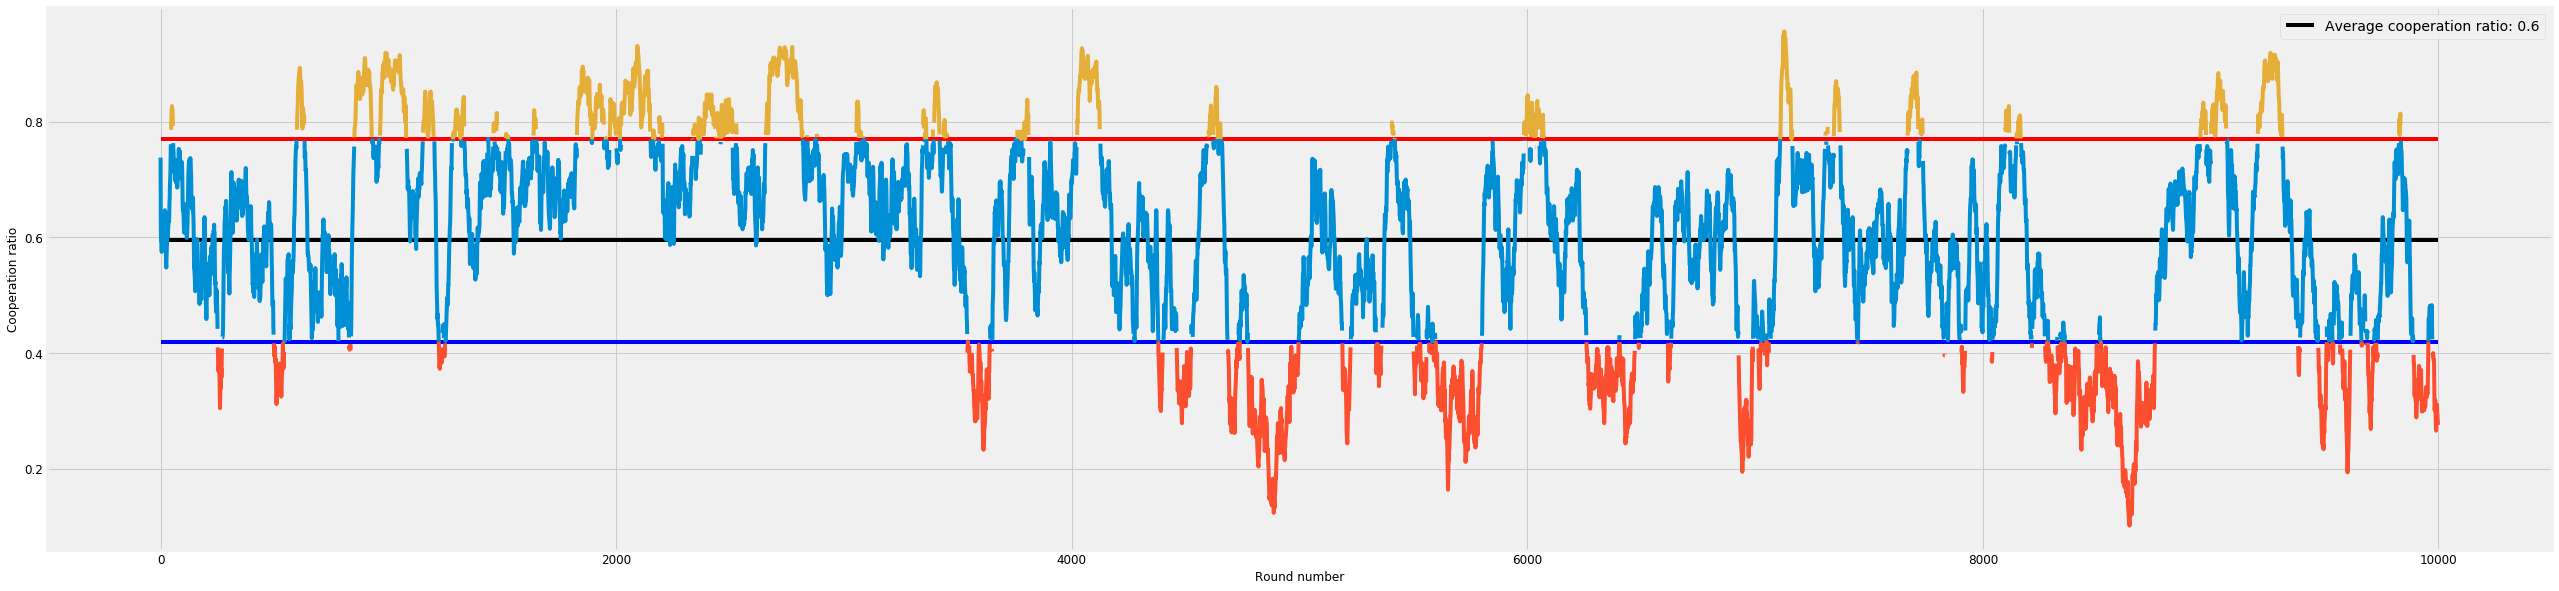

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdei", seed = str(seed))